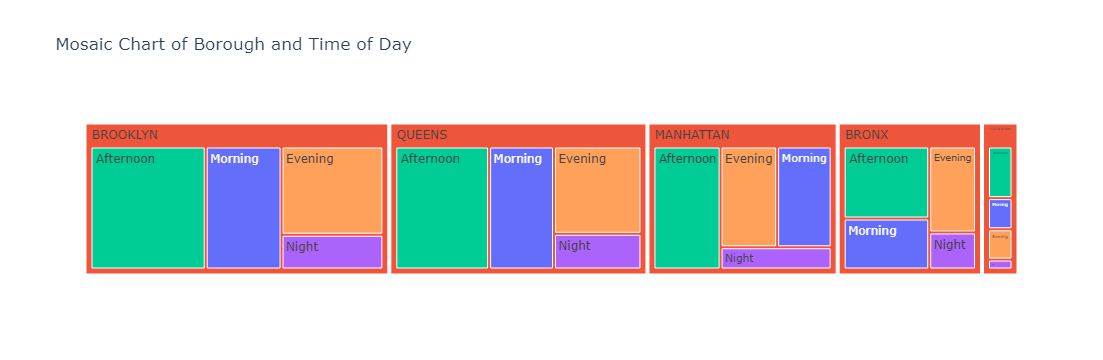

In [2]:
import pandas as pd
import plotly.express as px
 
# Load the dataset
df = pd.read_csv('F:/Works/Data Visualisation/Datasets/motor_collision_cleaned.csv', low_memory=False)
 
# Define categories for time of day
def categorize_time_of_day(time):
    if time is None:
        return 'Unknown'
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
 
# Apply categorization to 'CRASH TIME'
df['Time of Day'] = df['CRASH TIME'].apply(categorize_time_of_day)
 
# Create a mosaic chart using Plotly
fig = px.treemap(
    df,
    path=['BOROUGH', 'Time of Day'],
    values='COLLISION_ID',  # Use a unique identifier for sizing
    title='Mosaic Chart of Borough and Time of Day',
    color='Time of Day',  # Color based on Time of Day
    color_discrete_sequence=px.colors.qualitative.Plotly
)
 
# Save the chart as an image file
fig.write_image('F:/Works/Data Visualisation/Final Plots/Mosaic Plot.png')  # Specify the file path and format

# Show the chart
fig.show()